## BTC-USD data analysis with EDA and ML

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
data = pd.read_csv('btc_usd_data.csv', index_col=0, parse_dates=True)
print(data.head())

                 Close        High         Low        Open    Volume  \
Date                                                                   
2015-04-23  236.462006  236.475006  233.199005  234.052994  17036000   
2015-04-24  231.268005  236.304993  229.932999  235.970001  21448700   
2015-04-25  226.389999  232.561005  226.337006  231.235001  13957200   
2015-04-26  219.429993  226.944000  214.873993  226.410004  28943700   
2015-04-27  229.285995  233.304993  218.022995  219.429001  38574000   

             Price Range    Short MA     Long MA  Middle_Band  Upper_Band  \
Date                                                                        
2015-04-23  [178, 10178)  254.404161  295.813865   235.798251  260.909370   
2015-04-24  [178, 10178)  253.505961  295.319810   234.676801  258.386466   
2015-04-25  [178, 10178)  252.579301  294.770825   232.966401  253.529309   
2015-04-26  [178, 10178)  251.442681  294.103275   231.163300  249.626725   
2015-04-27  [178, 10178)  250.541

In [3]:
# Summary statistics
print(data.describe())

               Close           High            Low           Open  \
count    3552.000000    3552.000000    3552.000000    3552.000000   
mean    21007.491053   21453.056498   20491.598007   20982.321121   
std     22619.326427   23080.917689   22084.392120   22590.410425   
min       210.494995     225.718994     199.567001     210.067993   
25%      3654.963501    3710.748718    3613.682434    3652.251221   
50%     10191.874023   10393.982422    9893.782227   10191.124023   
75%     34298.430664   35167.797852   33246.929688   34291.703125   
max    106140.601562  108268.445312  105291.734375  106147.296875   

             Volume      Short MA       Long MA   Middle_Band     Upper_Band  \
count  3.552000e+03   3552.000000   3552.000000   3552.000000    3552.000000   
mean   1.979582e+10  20338.763485  18738.382328  20751.543634   23064.048587   
std    2.044732e+10  21574.478767  19366.251815  22237.465577   24507.538112   
min    1.060090e+07    232.261620    245.701329    227.834

In [4]:
# Check for missing values
print(data.isnull().sum())

Close          0
High           0
Low            0
Open           0
Volume         0
Price Range    0
Short MA       0
Long MA        0
Middle_Band    0
Upper_Band     0
Lower_Band     0
dtype: int64


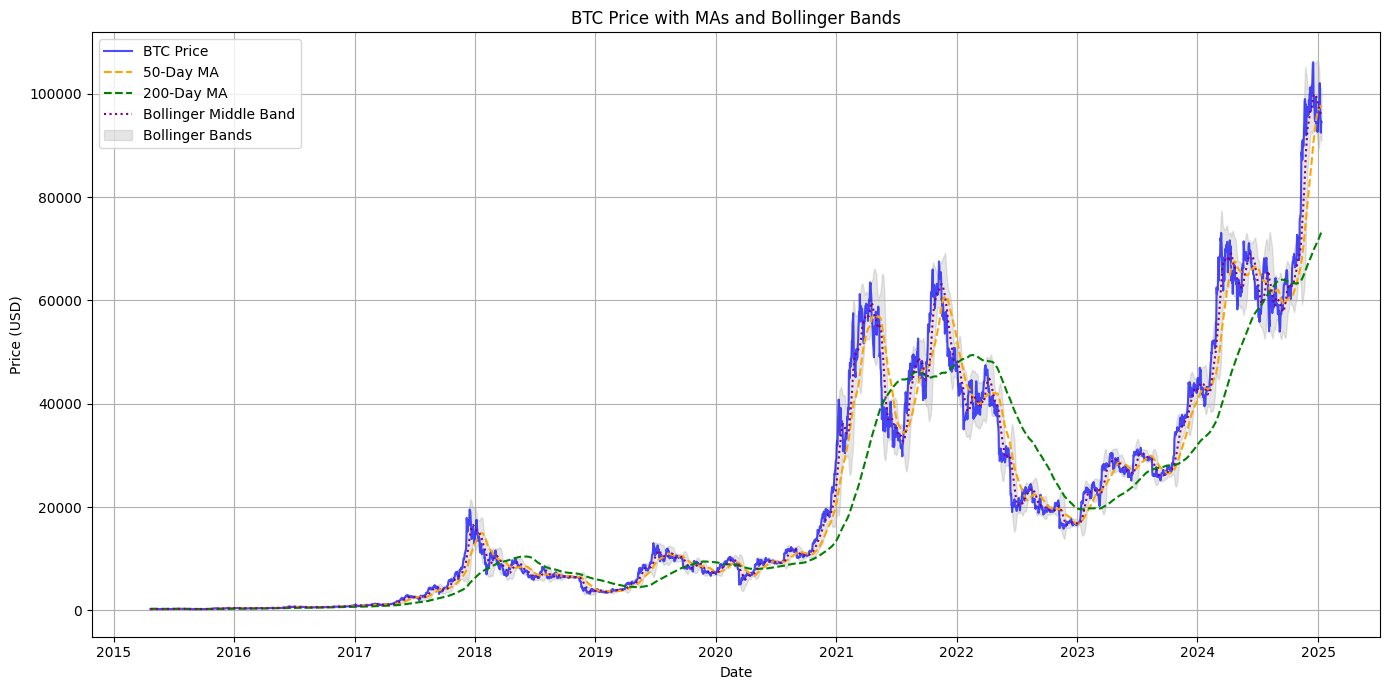

In [5]:
# Visualising price trends with MAs and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label="BTC Price", color="blue", alpha=0.7)
plt.plot(data.index, data['Short MA'], label="50-Day MA", color="orange", linestyle="--")
plt.plot(data.index, data['Long MA'], label="200-Day MA", color="green", linestyle="--")
plt.plot(data.index, data['Middle_Band'], label="Bollinger Middle Band", color="purple", linestyle=":")
plt.fill_between(data.index, data['Upper_Band'], data['Lower_Band'], color="gray", alpha=0.2, label="Bollinger Bands")
plt.title("BTC Price with MAs and Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

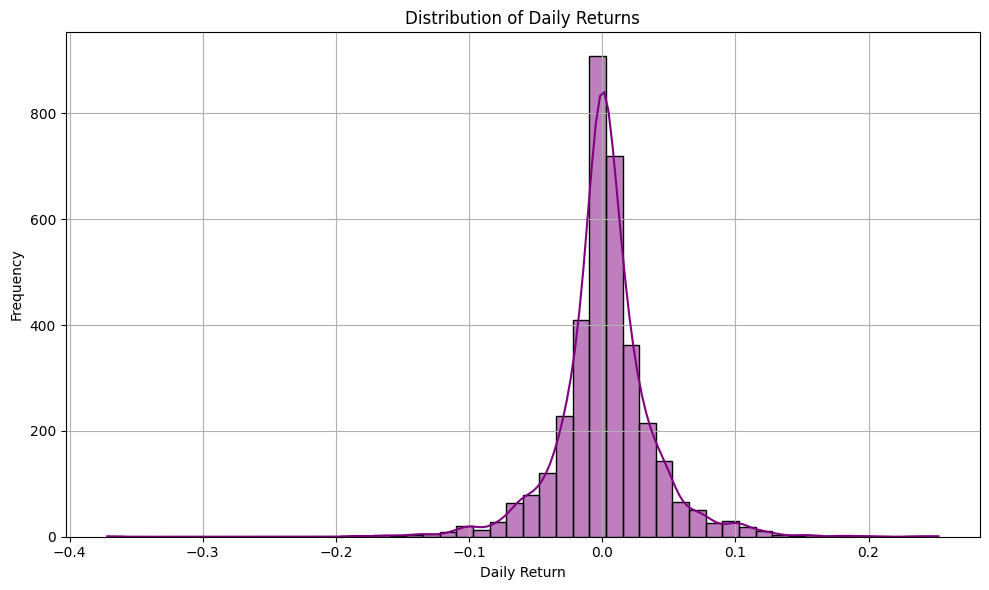

In [6]:
# Calculate daily returns
if 'Daily_Return' not in data.columns:
    data['Daily_Return'] = data['Close'].pct_change()

# Plot daily returns
plt.figure(figsize=(10,6))
sns.histplot(data['Daily_Return'].dropna(), kde=True, bins=50, color='purple')
plt.title('Distribution of Daily Returns')
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

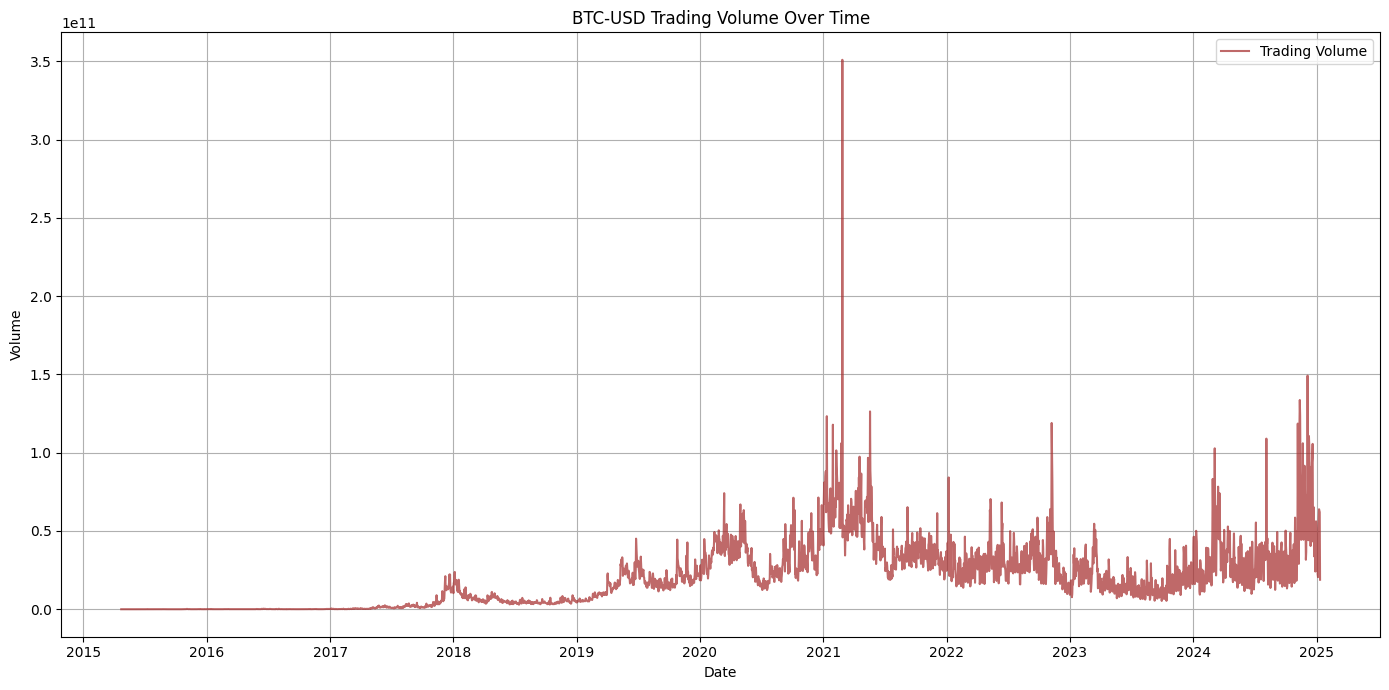

In [7]:
# Visualise trading volume trends over time
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Volume'], label="Trading Volume", color="brown", alpha=0.7)
plt.title("BTC-USD Trading Volume Over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

                 Close    Volume  Daily_Return  Short MA   Long MA
Close         1.000000  0.651223      0.001966  0.983096  0.930496
Volume        0.651223  1.000000     -0.010257  0.627618  0.576256
Daily_Return  0.001966 -0.010257      1.000000 -0.030719 -0.033071
Short MA      0.983096  0.627618     -0.030719  1.000000  0.958141
Long MA       0.930496  0.576256     -0.033071  0.958141  1.000000


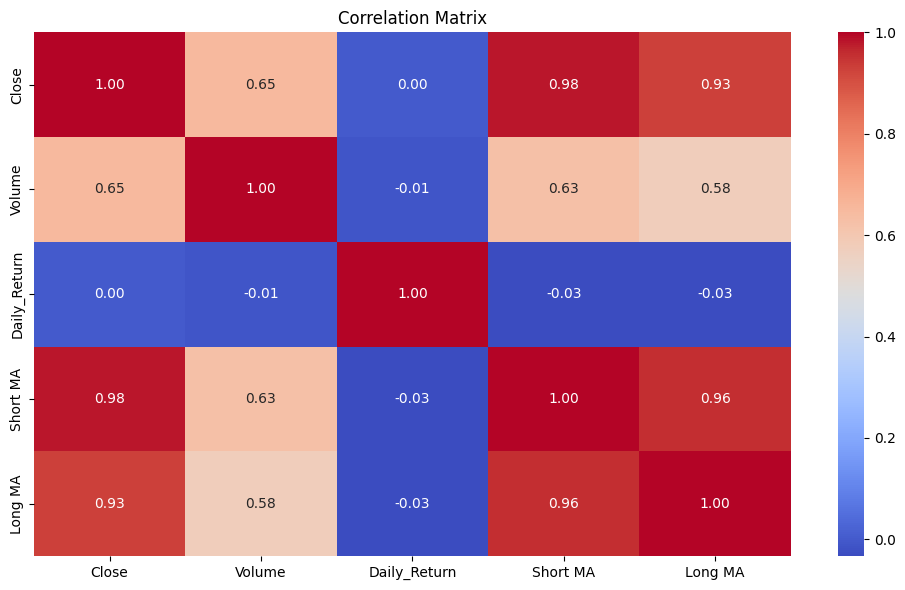

In [8]:
# Correlation between relevant columns
correlation_matrix = data[['Close', 'Volume', 'Daily_Return', 'Short MA', 'Long MA']].corr()
print(correlation_matrix)

# Heatmap of correlations
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
# Find dates with extreme returns
extreme_returns = data[data['Daily_Return'].abs() > data['Daily_Return'].std() * 2]
print(extreme_returns[['Close', 'Daily_Return', 'Volume']])

                   Close  Daily_Return        Volume
Date                                                
2015-08-18    211.078995     -0.181788      42147200
2015-08-19    226.684006      0.073930      60869200
2015-08-24    210.494995     -0.077460      59220700
2015-11-02    361.188995      0.109879     101918000
2015-11-03    403.416992      0.116914     206162000
...                  ...           ...           ...
2024-05-15  66267.492188      0.076596   39815167074
2024-05-20  71448.195312      0.078002   43850655717
2024-08-08  61710.136719      0.121443   45298472567
2024-11-06  75639.078125      0.090536  118592653963
2024-11-11  88701.484375      0.102235  117966845037

[208 rows x 3 columns]


## Machine Learning part

In [17]:
from sklearn.model_selection import train_test_split

# Prepare features and target
features = ['Volume', 'Daily_Return', 'Short MA', 'Long MA', 'Upper_Band', 'Lower_Band']
X = data[features].dropna()
y = data['Close'][X.index] # Align target with features

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print(f"Training set size: {X_train.shape[0]} rows")
print(f"Testing set size: {X_test.shape[0]} rows")

Training set size: 2840 rows
Testing set size: 711 rows


In [18]:
# Train a Baseline model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Evaluate the model
print("Training MAE:", mean_absolute_error(y_train, y_pred_train))
print("Test MAE:", mean_absolute_error(y_test, y_pred_test))
print("Training RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("Test RMSE:", mean_squared_error(y_test, y_pred_test, squared=False))

Training MAE: 1229.6348612461227
Test MAE: 1250.5344546574952
Training RMSE: 2062.8324117459692
Test RMSE: 2080.446391038747


In [19]:
# Training Advanced Models (Random Forest)
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest
rf_model = RandomForestRegressor(n_estimators=12, random_state=0)
rf_model.fit(X_train, y_train)

# Make predictions
rf_y_pred_test = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Test MAE:", mean_absolute_error(y_test, rf_y_pred_test))
print("Random Forest Test RMSE:", mean_squared_error(y_test, rf_y_pred_test, squared=False))

Random Forest Test MAE: 671.1561664236134
Random Forest Test RMSE: 1406.3329563167988


In [13]:
import sys
print(sys.executable)

/Users/pauliusmipauliusnialga/anaconda3/bin/python


In [25]:
# Training Advanced Models (XGBoost)
from xgboost import XGBRegressor

# Train XGBoost
xgb_model = XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
xgb_y_pred_test = xgb_model.predict(X_test)

# Evaluate the model
print("XGBoost Test MAE:", mean_absolute_error(y_test, xgb_y_pred_test))
print("XGBoost Test RMSE:", mean_squared_error(y_test, xgb_y_pred_test, squared=False))

XGBoost Test MAE: 657.7878321823356
XGBoost Test RMSE: 1221.1587206322934


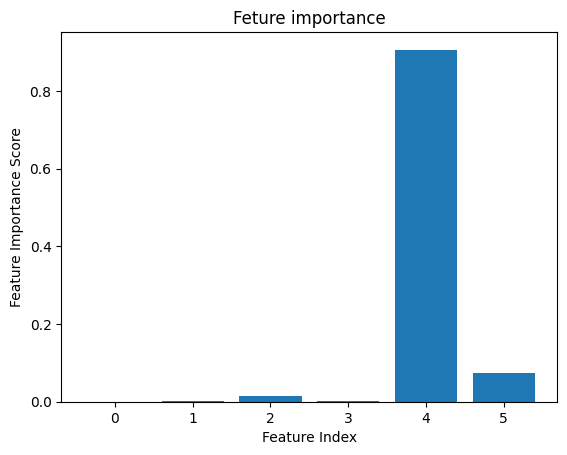

In [16]:
# Get feature importance scores
feature_importances = xgb_model.feature_importances_

# Plot feature importance
plt.bar(range(len(feature_importances)), feature_importances)
plt.xlabel("Feature Index")
plt.ylabel("Feature Importance Score")
plt.title("Feture importance")
plt.show()

## Applying Principal Component Analysis (PCA) to reduce dimensionality

In [26]:
# Scaling the data
from sklearn.preprocessing import StandardScaler

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
# Applying PCA
from sklearn.decomposition import PCA

# Fit PCA on the training data
pca = PCA(n_components=2) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Print explained varience ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Number of Components:", pca.n_components_)

Explained Variance Ratio: [0.72351582 0.16666632]
Number of Components: 2


In [61]:
from xgboost import XGBRFRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train XGBoost
xgb_model_pca = XGBRegressor(n_estimators=100, random_state=0)
xgb_model_pca.fit(X_train_pca, y_train)

# Predict on test data
xgb_y_pred_test_pca = xgb_model_pca.predict(X_test_pca)

# Evaluate the model
mae = mean_absolute_error(y_test, xgb_y_pred_test_pca)
rmse = mean_squared_error(y_test, xgb_y_pred_test_pca, squared=False)

print("XGBoost with PCA Test MAE:", mae)
print("XGBoost with PCA Test RMSE:", rmse)

XGBoost with PCA Test MAE: 2380.8369340936847
XGBoost with PCA Test RMSE: 4152.932244542589
